In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from numpy.random import random

In [4]:
%matplotlib inline

In [5]:
N=1500

In [6]:
mean1=[6,14]

In [7]:
mean2=[10,6]

In [8]:
mean3=[14,14]

In [9]:
cov=[[3.5,0],[0,3.5]]

In [10]:
np.random.seed(50)

In [11]:
X=np.random.multivariate_normal(mean1,cov,int(N/6))

In [12]:
X=np.concatenate((X,np.random.multivariate_normal(mean2,cov,int(N/6))))

In [13]:
X=np.concatenate((X,np.random.multivariate_normal(mean3,cov,int(N/6))))

In [14]:
X=np.concatenate((X,20*np.random.rand(int(N/2),2)))

In [15]:
y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

In [16]:
X.shape

(1500, 2)

In [17]:
y

array([1., 1., 1., ..., 0., 0., 0.])

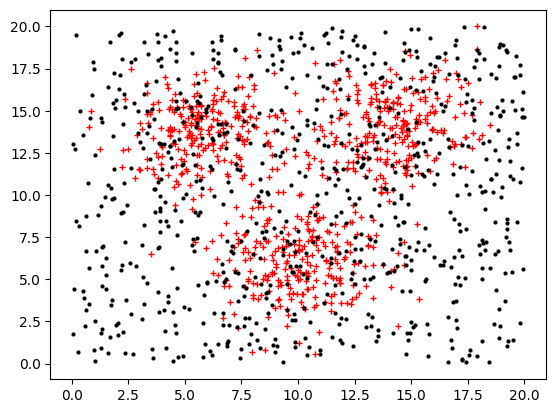

In [18]:
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In [19]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [20]:
len(maxDepths)

17

In [21]:
import numpy as np

In [22]:
trainAcc=np.zeros(len(maxDepths))

In [23]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
testAcc=np.zeros(len(maxDepths))

In [25]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn import tree

In [31]:
index=0
for depth in maxDepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(X_train,y_train)
    Y_predTrain=clf.predict(X_train)
    Y_predTest=clf.predict(X_test)
    trainAcc[index]=accuracy_score(y_train, Y_predTrain)#training data
    testAcc[index]=accuracy_score(y_test, Y_predTest)#test data
    index +=1

In [32]:
trainAcc

array([0.64416667, 0.68583333, 0.72416667, 0.72666667, 0.755     ,
       0.78      , 0.79      , 0.815     , 0.83416667, 0.9125    ,
       0.96833333, 0.99416667, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [33]:
testAcc

array([0.59666667, 0.65      , 0.69666667, 0.69666667, 0.72333333,
       0.71      , 0.72      , 0.71666667, 0.71333333, 0.74666667,
       0.69666667, 0.68333333, 0.67666667, 0.67666667, 0.68666667,
       0.68      , 0.68      ])

In [34]:
import matplotlib.pyplot as plt

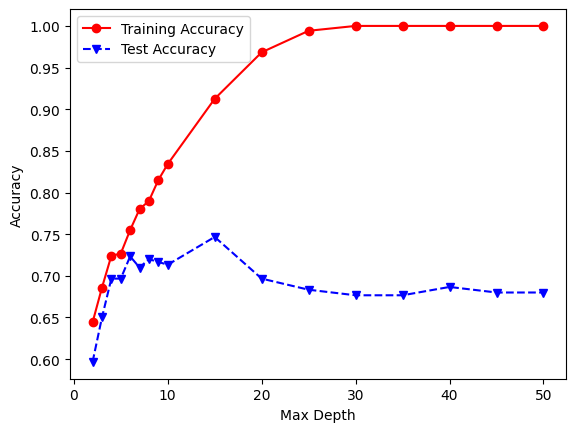

In [35]:
plt.plot(maxDepths,trainAcc,'ro-',maxDepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [36]:
testAcc.max()

0.7466666666666667